
# Machine Learning Assignment 5#  
Jared Rosenberger

CS-430-01

Machine Learning in The Cloud

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

# Problem 1

### Reading the Data

In [9]:
#Read landsat train and test
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS-430/Datasets/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS-430/Datasets/landsat_test.csv')
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


### Statistical and Visual Exploration

<Axes: xlabel='land_type', ylabel='count'>

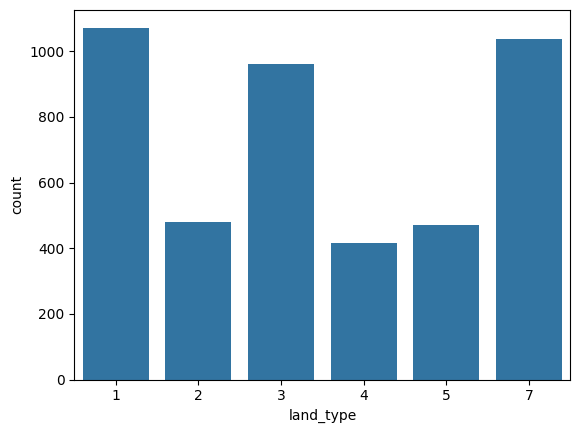

In [10]:
#bar plot for number of land types in landsat_train
sns.countplot(x='land_type', data=landsat_train)

<Axes: xlabel='land_type', ylabel='count'>

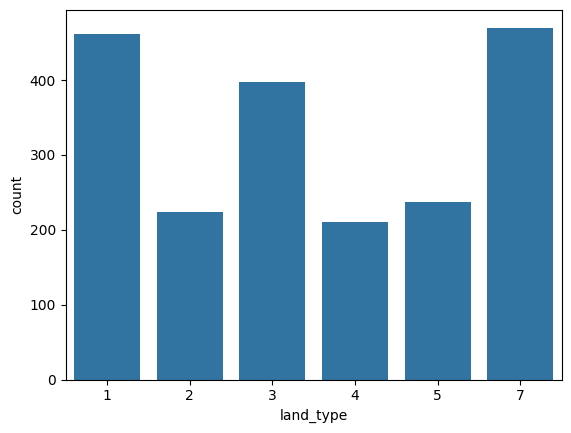

In [11]:
#Bar plot for number of land types in landsat_test
sns.countplot(x='land_type', data=landsat_test)

### Splitting Data into Train/Test

In [12]:
#Splitting into features and targets for train and test (target is land_type)
X_train = landsat_train.drop('land_type', axis=1)
y_train = landsat_train['land_type']
X_test = landsat_test.drop('land_type', axis=1)
y_test = landsat_test['land_type']

### Building the Pipeline

In [13]:
#Check dtypes of data
X_train.dtypes

,0
top_left_r,int64
top_left_g,int64
top_left_infra1,int64
top_left_infra2,int64
top_middle_r,int64
top_middle_g,int64
top_middle_infra1,int64
top_middle_infra2,int64
top_right_r,int64
top_right_g,int64


In [29]:
#Creat col transformer to MinMax scale numerical features
col_transformer = ColumnTransformer([('Scaler', MinMaxScaler(), X_train.columns)])

In [30]:
#Create pipeline to transform data and run RandomForrestClassifier
pipe = Pipeline(steps=[('transformer', col_transformer), ('classifier', RandomForestClassifier())])

### Executing the Model

In [31]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('Scaler', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'mid...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### Evaluating Model

In [33]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.98      0.98      0.98       224
           3       0.89      0.94      0.91       397
           4       0.78      0.62      0.69       211
           5       0.93      0.89      0.91       237
           7       0.87      0.91      0.89       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000



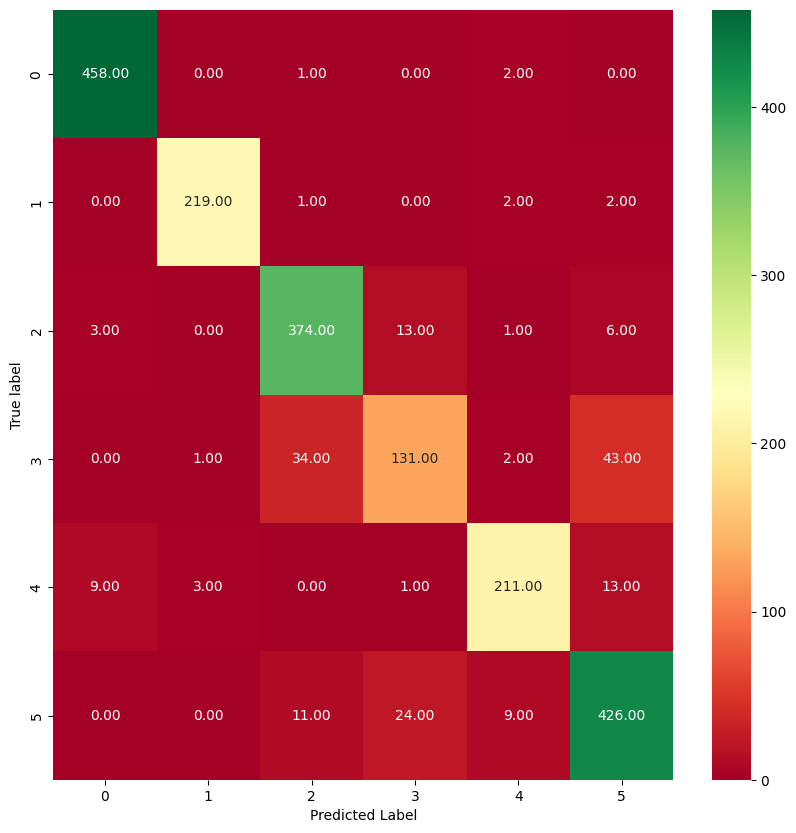

In [35]:
plot_cm(y_test, y_pred)

### Conclusion
This model is alright for predicting land_type. It's not the best possible model, struggling with types 3, 4, and 7, but the model has an overall accuracy of 0.91.

# Problem 2

###Reading the Data

In [36]:
#Read landsat train and test
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS-430/Datasets/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS-430/Datasets/landsat_test.csv')

### Splitting Data into Train/Test

In [37]:
#Splitting into features and targets for train and test (target is land_type)
X_train = landsat_train.drop('land_type', axis=1)
y_train = landsat_train['land_type']
X_test = landsat_test.drop('land_type', axis=1)
y_test = landsat_test['land_type']

### Building the Pipeline

In [38]:
#Creat col transformer to MinMax scale numerical features
col_transformer = ColumnTransformer([('Scaler', MinMaxScaler(), X_train.columns)])

In [40]:
#Create pipeline to transform data and run AdaBoost classifier
adaboost_pipe = Pipeline(steps=[('transformer', col_transformer), ('classifier', AdaBoostClassifier())])

### Executing the Model

In [41]:
adaboost_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('Scaler', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'mid...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', AdaBoostClassifier())])

### Evaluating Model

In [42]:
y_pred_adaboost = adaboost_pipe.predict(X_test)
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           1       0.94      0.76      0.84       461
           2       0.60      0.96      0.74       224
           3       0.77      0.67      0.72       397
           4       0.43      0.77      0.55       211
           5       0.42      0.20      0.27       237
           7       0.79      0.74      0.76       470

    accuracy                           0.69      2000
   macro avg       0.66      0.68      0.65      2000
weighted avg       0.72      0.69      0.69      2000



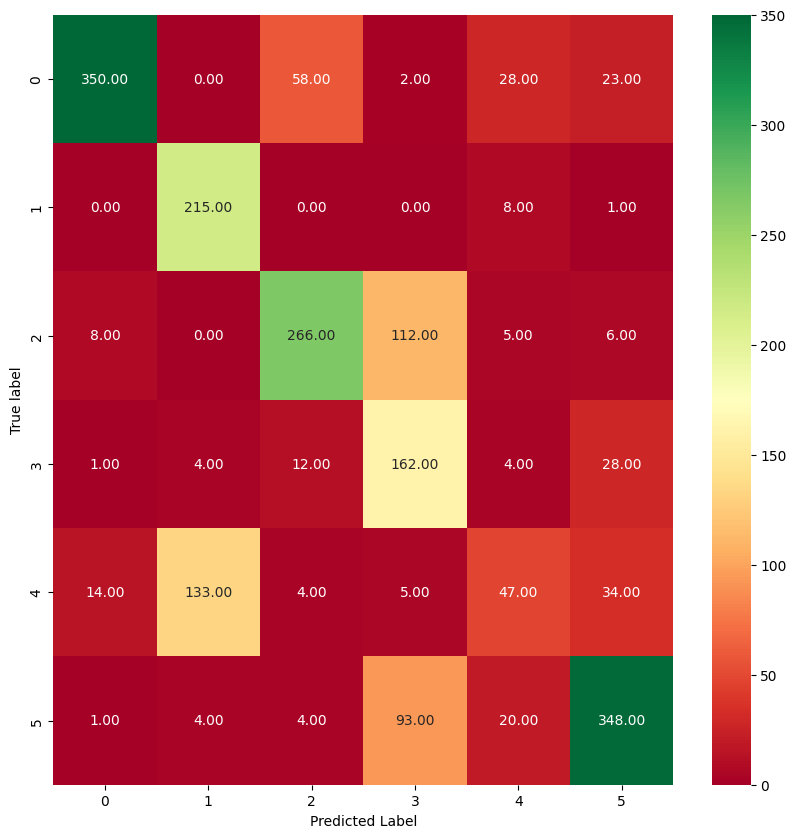

In [43]:
plot_cm(y_test, y_pred_adaboost)

### Conclusion
The AdaBoostClassifier is a much worse model for classifying land_types compared to the RandomForrestClassifier, with an overall accuracy of 0.69, and very poor class accuracy on classes 4, 5, and 2, as well as poor accuracy on classes 3 and 7.

#Problem 3

###Reading the Data

In [44]:
#Read banknote data
banknote_data = pd.read_csv('/content/gdrive/MyDrive/CS-430/Datasets/banknote_authentication.csv')
banknote_data.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


###Splitting Data into Train/Test

In [45]:
#Split data into features and target
X = banknote_data.drop('forgery', axis=1)
y = banknote_data['forgery']

In [46]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Building the Pipeline

In [50]:
#Check feature dtypes
X.dtypes

,0
variance,float64
skewness,float64
curtosis,float64
entropy,float64


In [51]:
#Creat col transformer to MinMax scale numerical features
col_transformer = ColumnTransformer([('Scaler', MinMaxScaler(), X_train.columns)])

In [52]:
#Create pipeline to transform data and run Random Forrest classifier
rf_pipe = Pipeline(steps=[('transformer', col_transformer), ('classifier', RandomForestClassifier())])

###Executing the Model

In [53]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('Scaler', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

###Evaluating Model

In [54]:
#Accuracy on the test set
y_pred_rf = rf_pipe.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [56]:
#Accuracy on training set to determine if the model is overfit
y_pred_rf_train = rf_pipe.predict(X_train)
print(classification_report(y_train, y_pred_rf_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



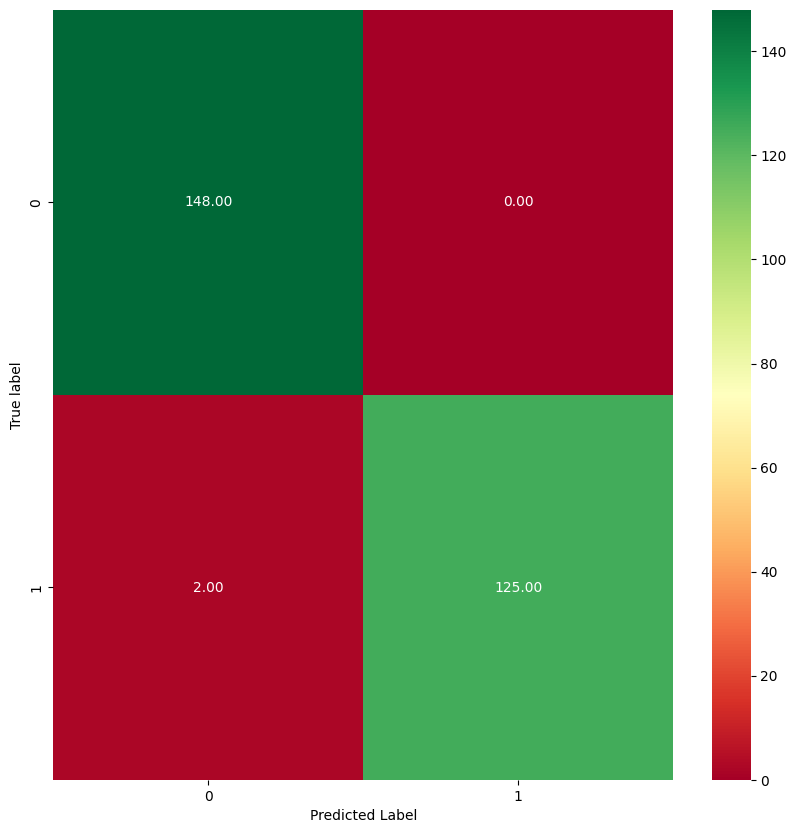

In [55]:
plot_cm(y_test, y_pred_rf)

###Conclusion
This is a very good model for predicting forgeries with an overall accuracy of 0.99, but may be slightly overfit to the dataset.